In [1]:
import os
os.chdir('..')
from visual import config
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np


In [2]:
## 01, 04, 16 for visualization in paper
ids = ['01', '04', '16']
s1_ass, s1_dess, s1_scenes = [], [], []
s2_imgs, truths = [], []
for id in ids:
  ## get paths
  path_as = config.root_proj + '/data/dset/s1_ascend/s1as_scene'+ id + '.tif'
  path_des = config.root_proj + '/data/dset/s1_descend/s1des_scene' + id + '.tif'
  path_s2 = config.root_proj + '/data/dset/s2_img/s2_scene' + id + '_img.tif'
  path_truth = config.root_proj + '/data/dset/s1_truth/scene' + id + '_wat_truth.tif'
  ## read in
  s1_as, s1_as_info = readTiff(path_as)
  s1_des, s1_des_info = readTiff(path_des)
  truth, truth_info = readTiff(path_truth)
  s2_img, s2_img_info = readTiff(path_s2)
  s1_scene = np.concatenate((s1_as, s1_des), axis=-1)
  ## append images
  s1_ass.append(s1_as); s1_dess.append(s1_des); s1_scenes.append(s1_scene)
  s2_imgs.append(s2_img); truths.append(truth)

len(s1_scenes)


3

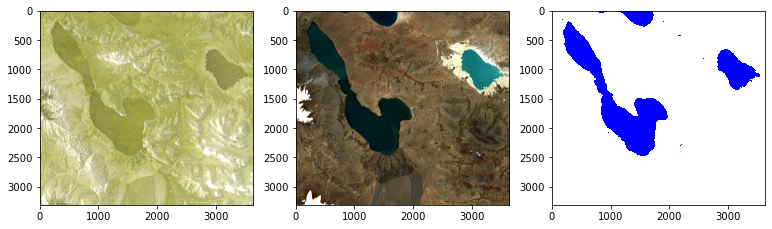

In [6]:
### check the scene and the truth
colors = ['white', 'blue'] 
cmap = mpl.colors.ListedColormap(colors)

idx = 0
plt.figure(figsize=(13,6))
plt.subplot(1,3,1)
imgShow(s1_scenes[idx], clip_percent=1, color_bands=(0,0,1))
plt.subplot(1,3,2)
imgShow(s2_imgs[idx])
plt.subplot(1,3,3)
plt.imshow(truths[idx], cmap=cmap)


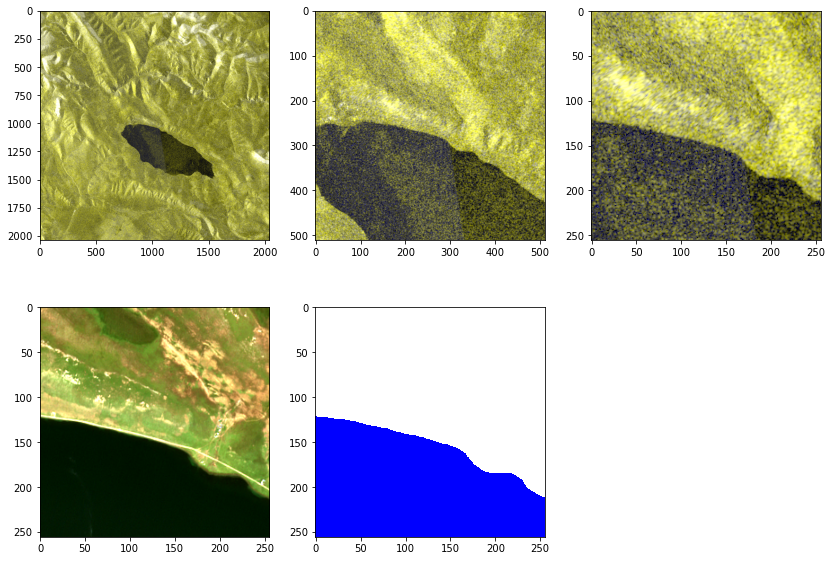

In [23]:
focus_region_h = [758,2798,808,2848]
focus_region_m = [1522,2034,1572,2084]
focus_region_l = [1650,1906,1700,1956]
### check the multiscale patch

idx = 2
plt.figure(figsize=(14,10))
plt.subplot(2,3,1)
imgShow(s1_ass[idx], color_bands=(0,0,1), clip_percent=1, focus_pix=focus_region_h)
plt.subplot(2,3,2)
imgShow(s1_ass[idx], color_bands=(0,0,1), clip_percent=1, focus_pix=focus_region_m)
plt.subplot(2,3,3)
imgShow(s1_ass[idx], color_bands=(0,0,1), clip_percent=1, focus_pix=focus_region_l)
plt.subplot(2,3,4)
imgShow(s2_imgs[idx], color_bands=(2,1,0), clip_percent=2, focus_pix=focus_region_l)
plt.subplot(2,3,5)
plt.imshow(truths[idx][focus_region_l[0]:focus_region_l[1],focus_region_l[2]:focus_region_l[3]],cmap=cmap)
# plt.savefig(config.root_proj + '/figure/dset_sam_16.png', bbox_inches='tight')
